## Python Code - Implementing Machine Learning Models

In [ ]:
pip install ucimlrepo

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import shap

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Reading the Data

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [ ]:
#Combining the Dataframe and saving the DataFrame
diab =  pd.concat([X, y], axis=1)



In [ ]:
diab.shape

(253680, 22)

In [ ]:
# Save the combined dataframe to a file
diab.to_csv('diabetes_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exploratory Data Analysis

In [ ]:
import copy

X1 = copy.deepcopy(X)
y1 = copy.deepcopy(y)

In [ ]:
X.shape

(253680, 21)

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
y.shape

(253680, 1)

In [ ]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing (Repeating the same steps as done in R)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [ ]:
#Converting variables to factors
X['HighBP'] = X['HighBP'].astype('category')
X['HighChol'] = X['HighBP'].astype('category')
X['CholCheck'] = X['CholCheck'].astype('category')
X['Smoker'] = X['Smoker'].astype('category')
X['Stroke'] = X['Stroke'].astype('category')
X['HeartDiseaseorAttack'] = X['HeartDiseaseorAttack'].astype('category')
X['PhysActivity'] = X['PhysActivity'].astype('category')
X['Fruits'] = X['Fruits'].astype('category')
X['Veggies'] = X['Veggies'].astype('category')
X['HvyAlcoholConsump'] = X['HvyAlcoholConsump'].astype('category')
X['AnyHealthcare'] = X['AnyHealthcare'].astype('category')
X['NoDocbcCost'] = X['NoDocbcCost'].astype('category')
X['GenHlth'] = X['GenHlth'].astype('category')
X['DiffWalk'] = X['DiffWalk'].astype('category')
X['Sex'] = X['Sex'].astype('category')
X['Age'] = X['Age'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Income'] = X['Income'].astype('category')



<ipython-input-8-9015cfbc12d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HighBP'] = X['HighBP'].astype('category')
<ipython-input-8-9015cfbc12d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HighChol'] = X['HighBP'].astype('category')
<ipython-input-8-9015cfbc12d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HighBP                253680 non-null  category
 1   HighChol              253680 non-null  category
 2   CholCheck             253680 non-null  category
 3   BMI                   253680 non-null  int64   
 4   Smoker                253680 non-null  category
 5   Stroke                253680 non-null  category
 6   HeartDiseaseorAttack  253680 non-null  category
 7   PhysActivity          253680 non-null  category
 8   Fruits                253680 non-null  category
 9   Veggies               253680 non-null  category
 10  HvyAlcoholConsump     253680 non-null  category
 11  AnyHealthcare         253680 non-null  category
 12  NoDocbcCost           253680 non-null  category
 13  GenHlth               253680 non-null  category
 14  MentHlth              253680 non-nul

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [ ]:
y = y.astype('category')

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Diabetes_binary  253680 non-null  category
dtypes: category(1)
memory usage: 248.0 KB


In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [ ]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [ ]:
# Find duplicate rows in X
duplicates = X.duplicated()

# Filter X and y to remove duplicate rows
X_filtered = X[~duplicates]
y_filtered = y[~duplicates]

X1_filtered = X1[~duplicates]
y1_filtered = y1[~duplicates]

# Check the shape of the filtered data
print("Shape of X after removing duplicates:", X_filtered.shape)
print("Shape of y after removing duplicates:", y_filtered.shape)

print("Shape of X after removing duplicates:", X1_filtered.shape)
print("Shape of y after removing duplicates:", y1_filtered.shape)


Shape of X after removing duplicates: (220485, 21)
Shape of y after removing duplicates: (220485, 1)
Shape of X after removing duplicates: (220485, 21)
Shape of y after removing duplicates: (220485, 1)


### Splitting the Data into Train and Test Partitions

In [ ]:

print("Length of X_filtered:", len(X_filtered))
print("Length of y_filtered:", len(y_filtered))

#y_filtered =y_filtered.to_numpy()

Length of X_filtered: 220485
Length of y_filtered: 220485


In [ ]:
print("Shape of y_filtered:", y_filtered.shape)
print("Unique values in y_filtered:", np.unique(y_filtered))

Shape of y_filtered: (220485, 1)
Unique values in y_filtered: [0 1]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_filtered,y_filtered,test_size=0.2, stratify=y_filtered,random_state=42)

In [ ]:
X_train.shape

(182326, 21)

In [ ]:
y_train.shape

(182326, 1)

In [ ]:
X_test.shape

(45582, 21)

In [ ]:
y_test.shape

(45582, 1)

### Baseline Model -- Full Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     37372
           1       0.52      0.15      0.23      6725

    accuracy                           0.85     44097
   macro avg       0.69      0.56      0.57     44097
weighted avg       0.81      0.85      0.81     44097

----------------------------------------------------------------------------------------------------
Confusion Matix


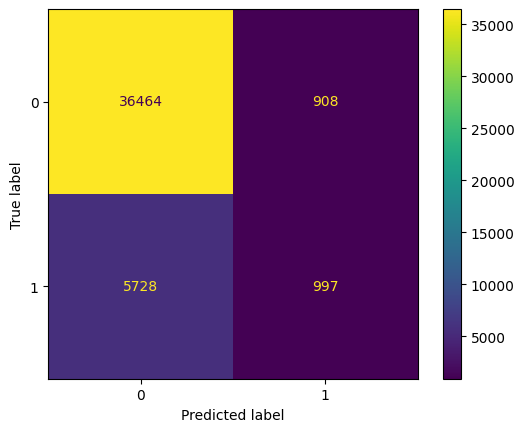

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print('-'*100)
print('Confusion Matix')
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

### Logistic Regression - Best Threshold by optmizing the predicitons on the Positive Class

In [ ]:
# Obtain predicted probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probability of positive class

# Define a range of threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize variables to store metric scores
best_threshold = None
best_metric_score = 0

# Loop through each threshold value
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)

    # Calculate metrics for the current threshold
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)

    # Choose the best threshold based on the F1-score
    if f1 > best_metric_score:
        best_metric_score = f1
        best_threshold = threshold

# Print the best threshold and its corresponding F1-score
print("Best Threshold:", best_threshold)
print("Best F1-score:", best_metric_score)

Best Threshold: 0.2
Best F1-score: 0.45172047900560863


              precision    recall  f1-score   support

           0       0.93      0.77      0.84     37372
           1       0.34      0.66      0.45      6725

    accuracy                           0.75     44097
   macro avg       0.63      0.72      0.65     44097
weighted avg       0.84      0.75      0.78     44097

----------------------------------------------------------------------------------------------------
Confusion Matix


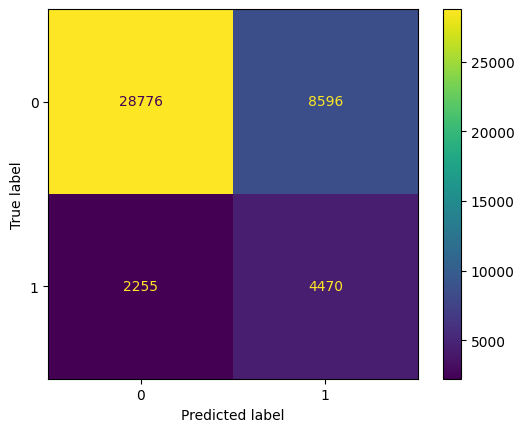

In [ ]:
# Convert probabilities to binary predictions based on the best threshold
y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_best_threshold))
print('-'*100)
print('Confusion Matix')
cm = confusion_matrix(y_test, y_pred_best_threshold, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

### Decision Tree Classifier

In [ ]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 3, 4,6],
    'max_depth': [ 10,12,15, 20, 30]
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Parameters:", grid_search.best_params_)
print("Recall:", recall_score(y_test, y_pred))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Model Parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2}
Recall: 0.654110089064097


In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Random Over Sampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train_resampled , y_train_resampled)

# Make predictions on the test data using the best model
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.7541246897357279


              precision    recall  f1-score   support

           0       0.94      0.68      0.79     37248
           1       0.30      0.75      0.43      6849

    accuracy                           0.69     44097
   macro avg       0.62      0.72      0.61     44097
weighted avg       0.84      0.69      0.74     44097

----------------------------------------------------------------------------------------------------


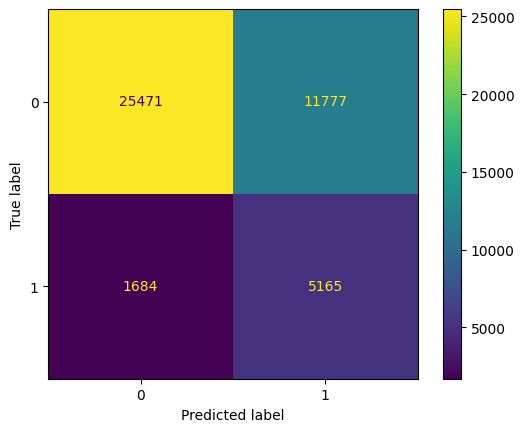

In [ ]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('-' * 100)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred ,labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

In [ ]:

# Calculate the predicted probabilities for the positive class (class 1)
y_prob = dt.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.7725120989425049


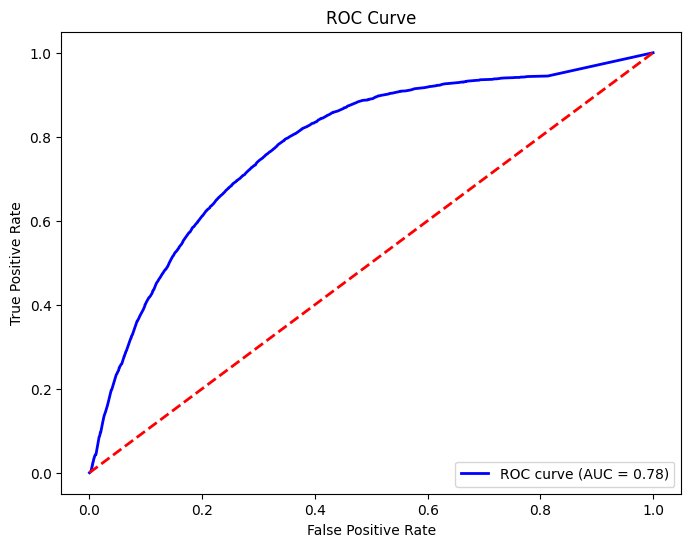

In [ ]:


# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import export_text

# Assuming dt is your DecisionTreeClassifier instance trained on your data
tree_rules = export_text(dt, feature_names=list(X_train.columns))
print(tree_rules)

In [ ]:
# Feature Importance
feature_importances = dt.feature_importances_

# Pair the feature names with their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort the dictionary by importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: HighChol, Importance: 0.3343657803417313
Feature: GenHlth, Importance: 0.2280069797596461
Feature: BMI, Importance: 0.1317135442493548
Feature: Age, Importance: 0.10720574452055427
Feature: Income, Importance: 0.030247035918474822
Feature: PhysHlth, Importance: 0.02551737349622237
Feature: MentHlth, Importance: 0.024318847339946745
Feature: Education, Importance: 0.021775903726090166
Feature: HeartDiseaseorAttack, Importance: 0.013648394420057455
Feature: HvyAlcoholConsump, Importance: 0.011774610591809235
Feature: Sex, Importance: 0.0115068727611344
Feature: DiffWalk, Importance: 0.009094459736320962
Feature: Smoker, Importance: 0.008359971261011552
Feature: CholCheck, Importance: 0.00788424955411808
Feature: PhysActivity, Importance: 0.007831356929281165
Feature: Fruits, Importance: 0.006765431707662833
Feature: Veggies, Importance: 0.005773803382994644
Feature: NoDocbcCost, Importance: 0.005214414247725762
Feature: Stroke, Importance: 0.005049278346928514
Feature: AnyHealth

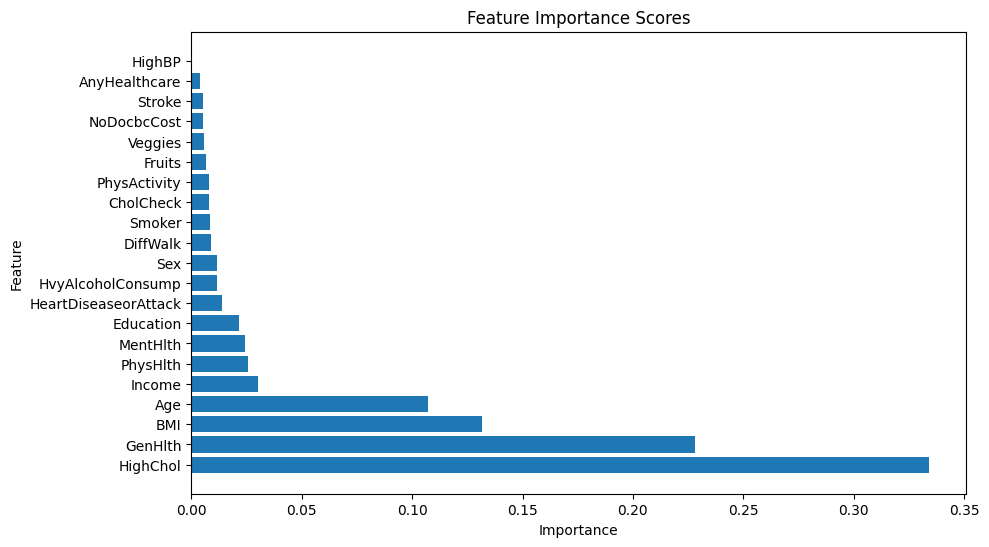

In [ ]:

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importance)

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

 98%|===================| 86653/88194 [00:44<00:00]       

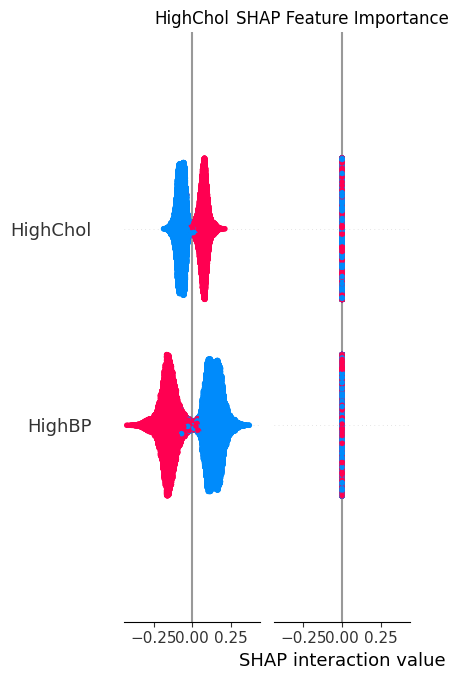

In [ ]:
# Initialize the explainer object
explainer = shap.Explainer(dt, X_train_resampled)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.title('SHAP Feature Importance')
plt.show()

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data using the best model
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Recall:", recall_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Recall: 0.623124196084036


              precision    recall  f1-score   support

           0       0.92      0.70      0.80     43739
           1       0.25      0.62      0.36      6997

    accuracy                           0.69     50736
   macro avg       0.59      0.66      0.58     50736
weighted avg       0.83      0.69      0.74     50736

----------------------------------------------------------------------------------------------------


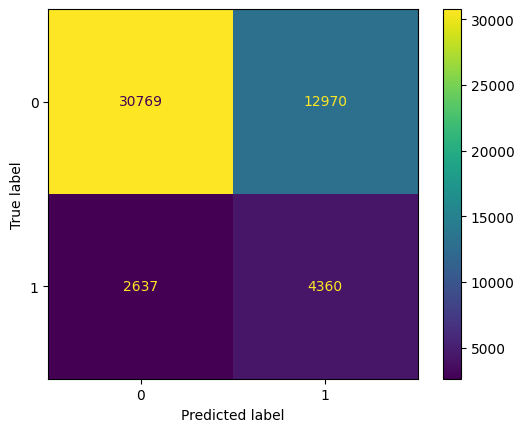

In [ ]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('-' * 100)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred ,labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

In [ ]:
# Calculate the predicted probabilities for the positive class (class 1)
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.7178008794962484


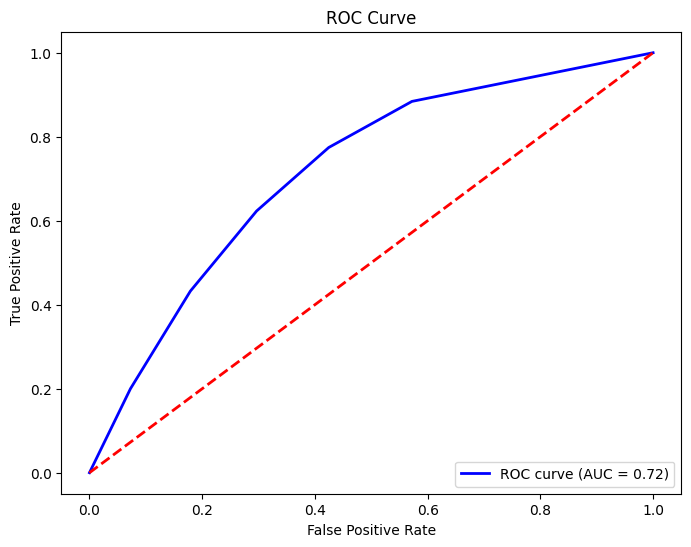

In [ ]:
# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Random Over Sampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate recall
recall_rf = recall_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)

<ipython-input-56-4d39a0a233c1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train_resampled, y_train_resampled)


Accuracy: 0.7221579699299272
Recall: 0.7472623740692071


              precision    recall  f1-score   support

           0       0.94      0.72      0.81     37248
           1       0.33      0.75      0.46      6849

    accuracy                           0.72     44097
   macro avg       0.63      0.73      0.63     44097
weighted avg       0.84      0.72      0.76     44097

----------------------------------------------------------------------------------------------------


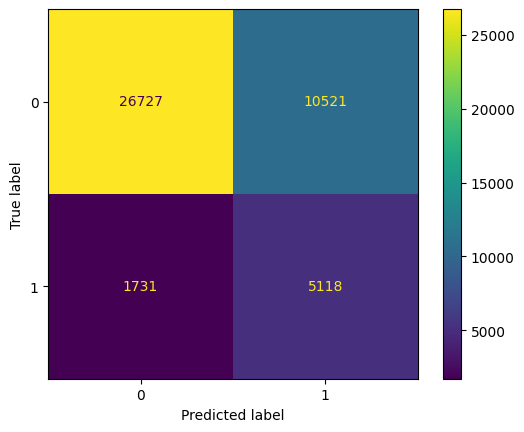

In [ ]:
# Generate classification report
print(classification_report(y_test, y_pred_rf))
print('-' * 100)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf ,labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

In [ ]:
# Calculate the predicted probabilities for the positive class (class 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8088849383033818


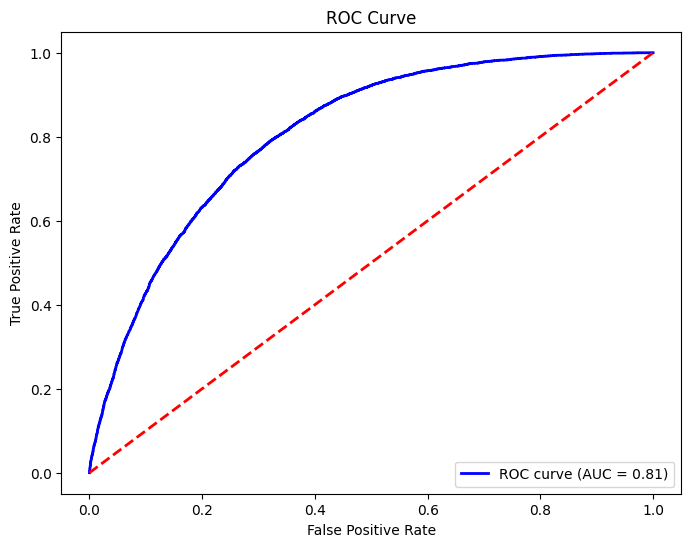

In [ ]:
# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

100%|===================| 88085/88194 [08:02<00:00]       

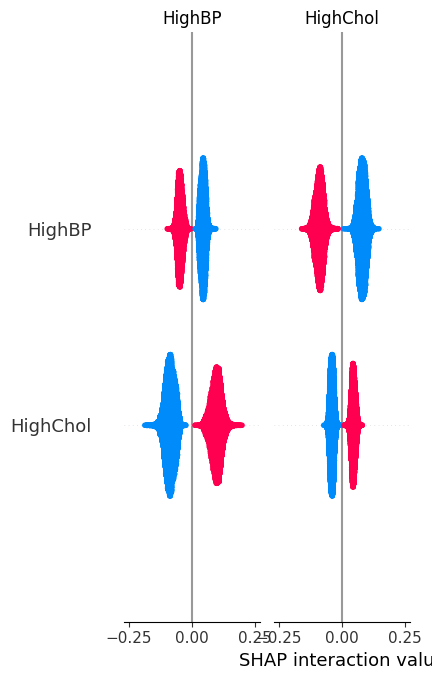

In [ ]:
# Initialize the SHAP explainer with the fitted Random Forest classifier
explainer = shap.Explainer(rf_classifier, X_train_resampled)

# Calculate SHAP values for all samples in the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_

# Pair the feature names with their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort the dictionary by importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: GenHlth, Importance: 0.17241299081347808
Feature: HighBP, Importance: 0.169311846303594
Feature: BMI, Importance: 0.15441208246901658
Feature: HighChol, Importance: 0.145446583860492
Feature: Age, Importance: 0.08365026285541124
Feature: DiffWalk, Importance: 0.06636747714112083
Feature: PhysHlth, Importance: 0.0436404523334487
Feature: Income, Importance: 0.03298045389135406
Feature: HeartDiseaseorAttack, Importance: 0.022775317977946
Feature: MentHlth, Importance: 0.016457579863271534
Feature: HvyAlcoholConsump, Importance: 0.016118097699394148
Feature: Education, Importance: 0.0156100205464759
Feature: CholCheck, Importance: 0.012160821468611081
Feature: Sex, Importance: 0.009492317187413215
Feature: Stroke, Importance: 0.00677472174925842
Feature: PhysActivity, Importance: 0.006500264592560889
Feature: Fruits, Importance: 0.005867390334691694
Feature: Smoker, Importance: 0.005822548521613176
Feature: Veggies, Importance: 0.005527381112751285
Feature: NoDocbcCost, Importanc

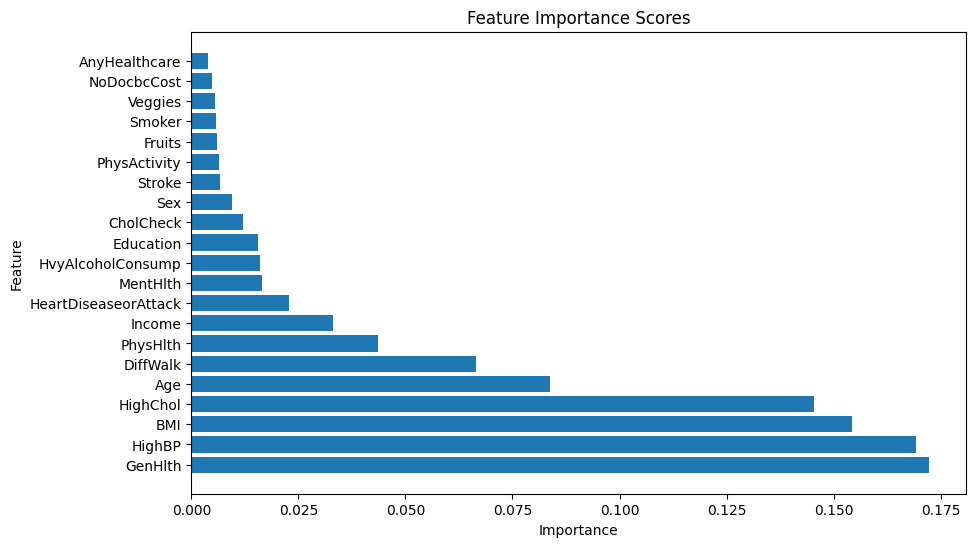

In [ ]:
# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importance)

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

### XGBoost

In [ ]:
# Random Over Sampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_filtered, y1_filtered, test_size=0.2, random_state=42)
oversampler = RandomOverSampler()
X1_train_resampled, y1_train_resampled = oversampler.fit_resample(X1_train, y1_train)

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X1_train_resampled , y1_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y1_pred=xg.predict(X1_test)

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     37248
           1       0.33      0.78      0.46      6849

    accuracy                           0.72     44097
   macro avg       0.64      0.74      0.63     44097
weighted avg       0.85      0.72      0.75     44097

----------------------------------------------------------------------------------------------------


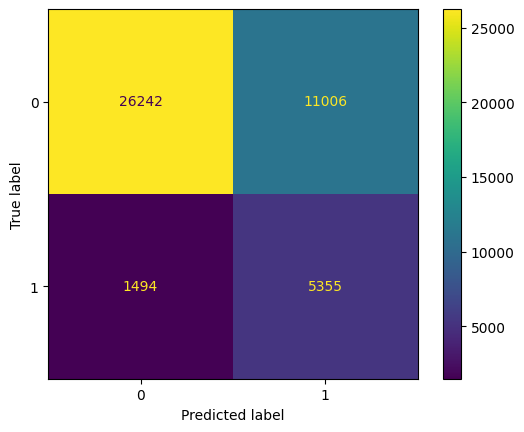

In [ ]:
# Generate classification report
print(classification_report(y1_test, y1_pred))
print('-' * 100)

# Generate confusion matrix
cm = confusion_matrix(y1_test, y1_pred ,labels=np.unique(y1_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y1_test))
disp.plot()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_proba = xg.predict_proba(X1_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y1_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.8210658057538689


100%|===================| 44054/44097 [05:05<00:00]       

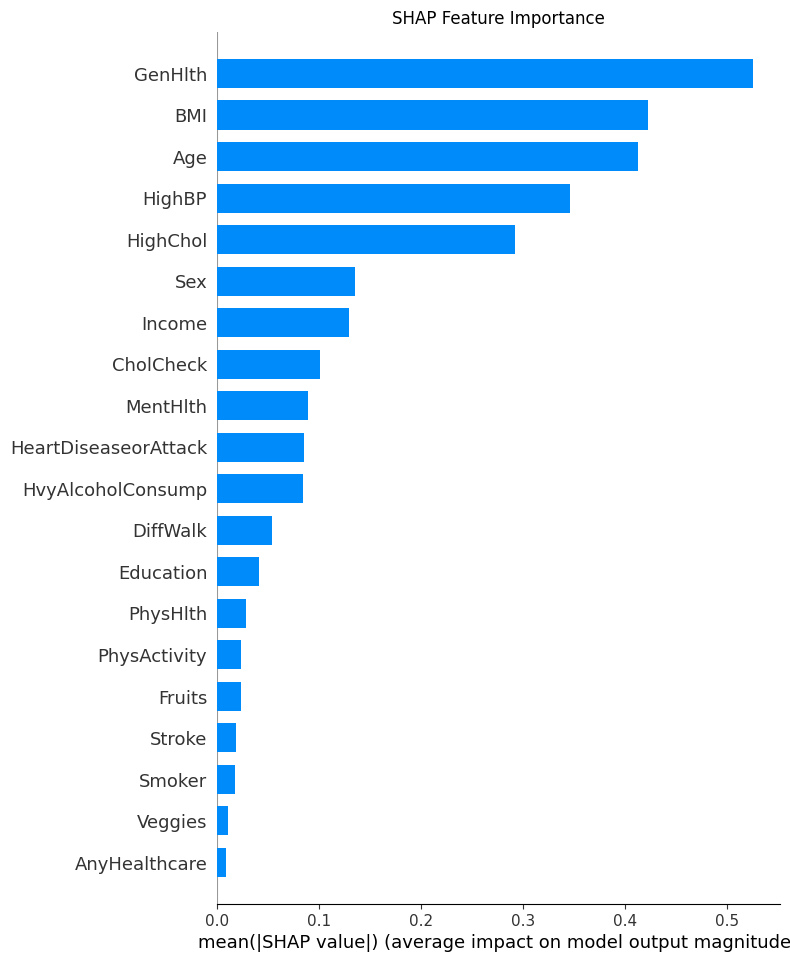

In [ ]:
# Initialize the explainer object
explainer = shap.Explainer(xg, X1_train_resampled)

# Calculate SHAP values
shap_values = explainer.shap_values(X1_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X1_test, plot_type='bar', show=False)
plt.title('SHAP Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, recall_score

# Define a custom scorer for recall of the positive class
scorer = make_scorer(recall_score, pos_label=1)

# Define a smaller hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2]
}

# Initialize the XGBoost classifier
xg = XGBClassifier(eval_metric='error', objective='binary:logistic')

# Initialize GridSearchCV with custom scoring
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, scoring=scorer)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate recall for the positive class
recall = recall_score(y_test, y_pred, pos_label=1)

print("Best Model Parameters:", grid_search.best_params_)
print("Recall for positive class:", recall)

Best Model Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'scale_pos_weight': 2, 'subsample': 0.8}
Recall for positive class: 0.43904530513077034


              precision    recall  f1-score   support

           0       0.91      0.92      0.91     43739
           1       0.46      0.44      0.45      6997

    accuracy                           0.85     50736
   macro avg       0.68      0.68      0.68     50736
weighted avg       0.85      0.85      0.85     50736

----------------------------------------------------------------------------------------------------


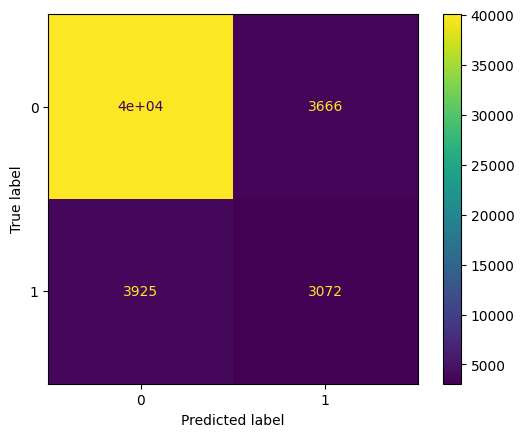

In [ ]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('-' * 100)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred ,labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

### Perceptron Classifier

In [ ]:
from sklearn.linear_model import Perceptron

# Random Over Sampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_filtered, y_filtered, test_size=0.2, random_state=42)
oversampler = RandomOverSampler()
X1_train_resampled, y1_train_resampled = oversampler.fit_resample(X1_train, y1_train)

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

# Initialize the Perceptron classifier
perceptron = Perceptron()

# Train the Perceptron classifier
perceptron.fit(X1_train_resampled, y1_train_resampled)

# Make predictions
y1_pred = perceptron.predict(X1_test)

# Evaluate accuracy
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6957842937161258


              precision    recall  f1-score   support

           0       0.95      0.67      0.79     37248
           1       0.31      0.81      0.45      6849

    accuracy                           0.70     44097
   macro avg       0.63      0.74      0.62     44097
weighted avg       0.85      0.70      0.74     44097

----------------------------------------------------------------------------------------------------


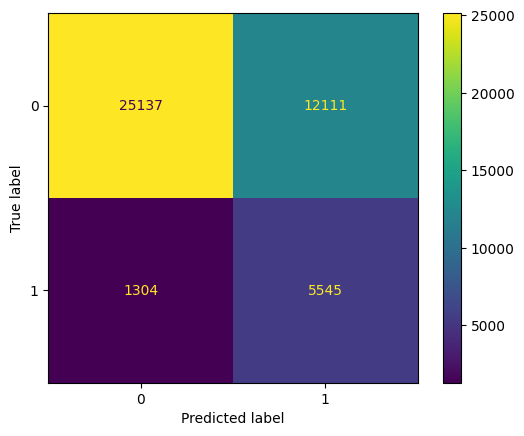

In [ ]:
# Generate classification report
print(classification_report(y1_test, y1_pred))
print('-' * 100)

# Generate confusion matrix
cm = confusion_matrix(y1_test, y1_pred ,labels=np.unique(y1_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y1_test))
disp.plot()
plt.show()

In [ ]:

# Predict probability of positive class
y1_pred_proba = perceptron.decision_function(X1_test)

# Calculate AUC
auc = roc_auc_score(y1_test, y1_pred_proba)
print("AUC:", auc)

AUC: 0.8027268439807853


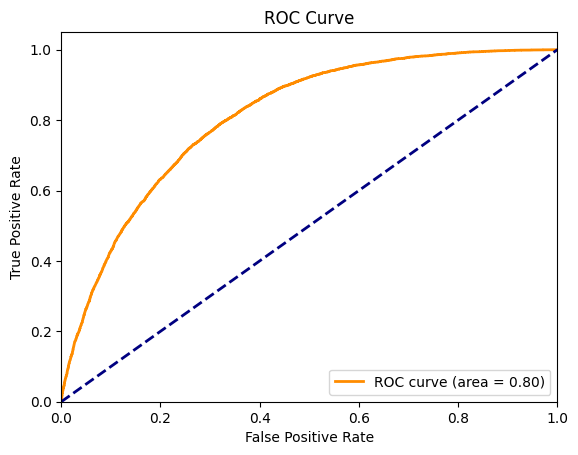

In [ ]:
# ROC Curve

# Compute ROC AUC score
roc_auc_value = roc_auc_score(y1_test, y1_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

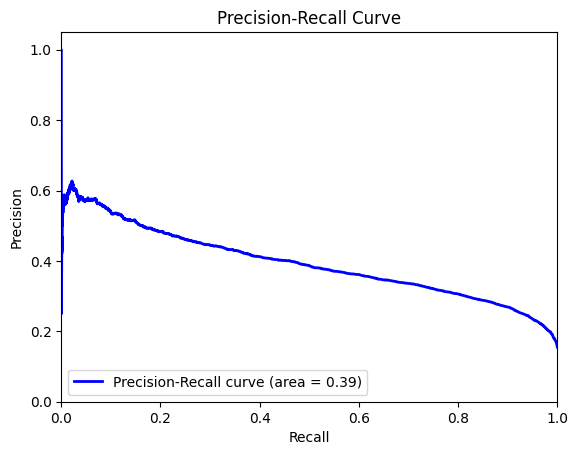

AUC PRC: 0.3931642449155919


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y1_test, y1_pred_proba)

# Compute AUC PRC
auc_prc_value = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc_prc_value)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print("AUC PRC:", auc_prc_value)

In [ ]:
explainer = shap.Explainer(perceptron, X1_train_resampled)

In [ ]:
shap_values = explainer.shap_values(X1_test)

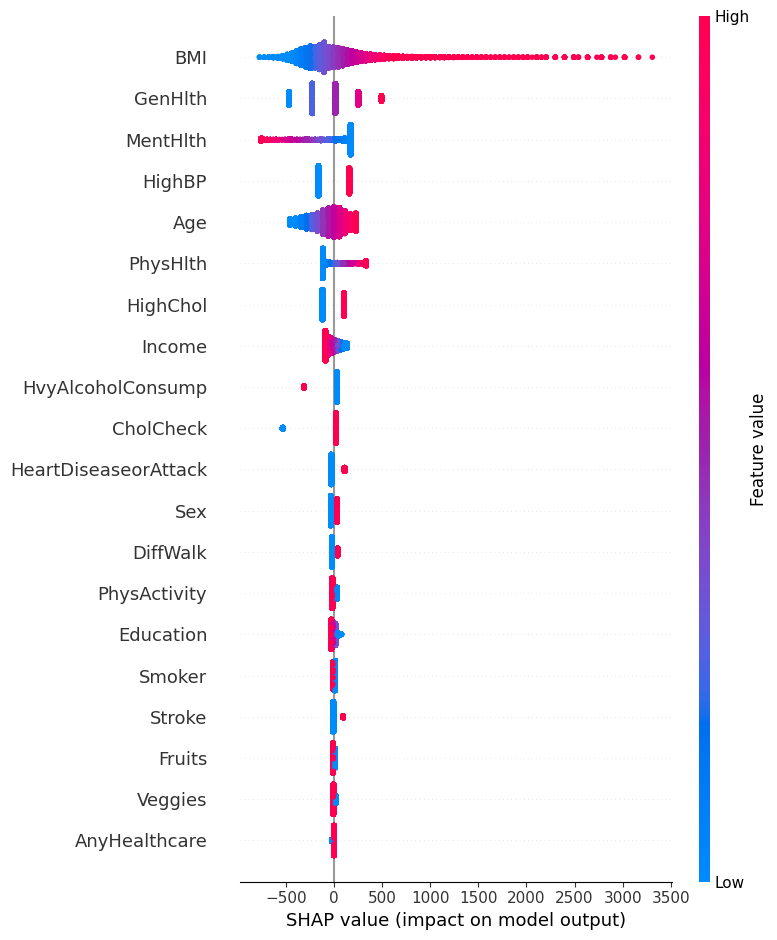

In [ ]:
shap.summary_plot(shap_values, X1_test)

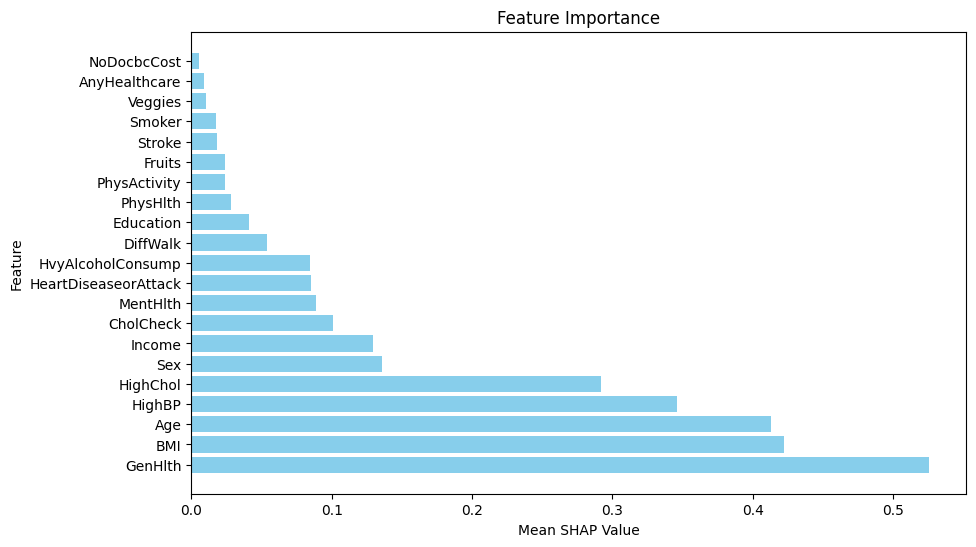

In [ ]:


# Calculate the mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Create a DataFrame to store feature names and their corresponding mean SHAP values
feature_importance_df = pd.DataFrame(list(zip(X1_test.columns, mean_shap_values)), columns=['Feature', 'Mean SHAP Value'])

# Sort the DataFrame by mean SHAP values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Mean SHAP Value', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


<ipython-input-201-b540984a355a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=feature_importance_df['Feature'], x=feature_importance_df['Mean SHAP Value'], palette='viridis')


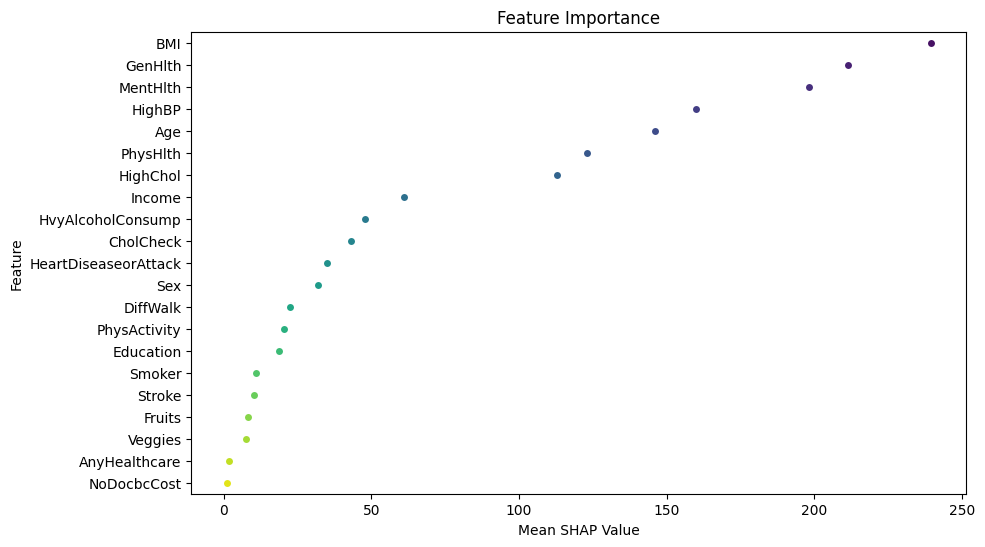

In [ ]:
# Plot bee swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(y=feature_importance_df['Feature'], x=feature_importance_df['Mean SHAP Value'], palette='viridis')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

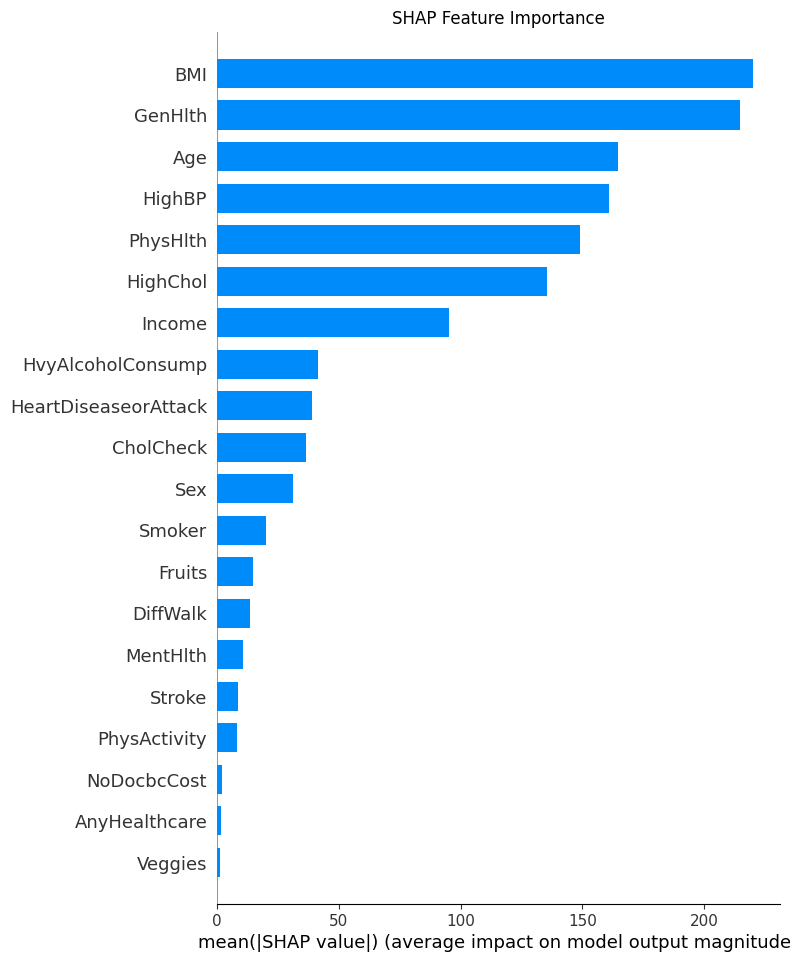

In [ ]:

# Initialize the explainer object
explainer = shap.Explainer(perceptron, X1_train_resampled)

# Calculate SHAP values
shap_values = explainer.shap_values(X1_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X1_test, plot_type='bar', show=False)
plt.title('SHAP Feature Importance')
plt.show()

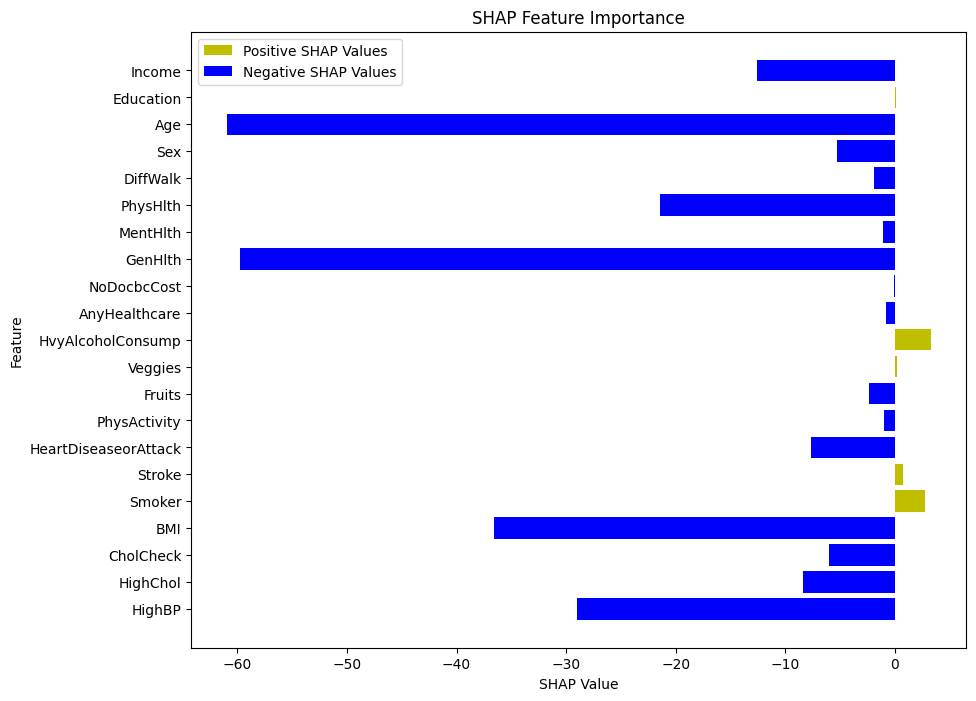

In [ ]:
# Calculate mean SHAP values for each feature
mean_shap_values = np.mean(shap_values, axis=0)

# Separate positive and negative SHAP values
positive_shap_values = np.maximum(mean_shap_values, 0)
negative_shap_values = np.minimum(mean_shap_values, 0)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Plot positive SHAP values
ax.barh(X1_test.columns, positive_shap_values, color='y', label='Positive SHAP Values')

# Plot negative SHAP values
ax.barh(X1_test.columns, negative_shap_values, color='b', label='Negative SHAP Values')

# Add labels and title
ax.set_xlabel('SHAP Value')
ax.set_ylabel('Feature')
ax.set_title('SHAP Feature Importance')

# Add legend
ax.legend()

# Show plot
plt.show()

In [ ]:
# Print SHAP values for each feature
print("SHAP Values:")
for feature, shap_val in zip(X1_test.columns, shap_values):
    print(f"{feature}: {shap_val.mean()}")

SHAP Values:
HighBP: -9.827619047619041
HighChol: 46.69619047619047
CholCheck: 7.791428571428573
BMI: -4.256190476190476
Smoker: 10.839047619047617
Stroke: -13.303809523809523
HeartDiseaseorAttack: -30.922857142857147
PhysActivity: -23.732380952380954
Fruits: 72.07714285714289
Veggies: -66.77999999999997
HvyAlcoholConsump: 34.505714285714284
AnyHealthcare: 20.02952380952381
NoDocbcCost: -28.399047619047618
GenHlth: -60.11333333333333
MentHlth: -24.303809523809523
PhysHlth: -23.732380952380954
DiffWalk: 42.83904761904762
Sex: -18.208571428571428
Age: -48.73238095238096
Education: -30.446666666666673
Income: 0.26761904761905597


### Logistic Regression using Features which has higher feature importance.

In [ ]:
new_X = X_filtered[['BMI','GenHlth','Age','HighBP','PhysHlth','HighChol']]
new_X.head()
new_X.shape


(220485, 6)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(new_X,y_filtered, test_size = 0.2, random_state =42)
oversampler = RandomOverSampler()
X2_train_resampled, y2_train_resampled = oversampler.fit_resample(X2_train, y2_train)

In [ ]:
X2_train_resampled.head()

,BMI,GenHlth,Age,HighBP,PhysHlth,HighChol
0,27,3,13,1,0,1
1,33,3,9,1,3,1
2,27,4,4,0,1,0
3,20,2,7,0,0,0
4,27,2,8,1,0,1


In [ ]:
y2_train_resampled.head()

,Diabetes_binary
0,1
1,0
2,0
3,0
4,0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.70      0.80     37248
           1       0.32      0.75      0.45      6849

    accuracy                           0.71     44097
   macro avg       0.63      0.73      0.62     44097
weighted avg       0.84      0.71      0.75     44097

----------------------------------------------------------------------------------------------------
Confusion Matix


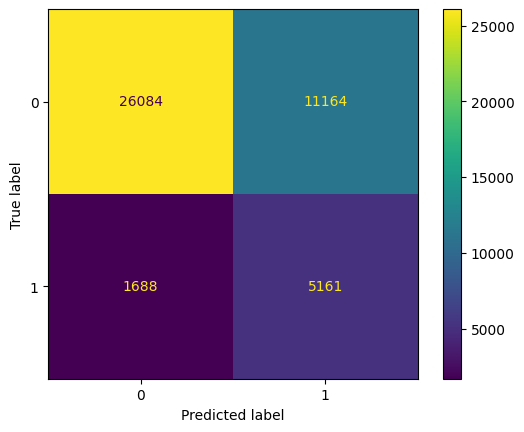

In [ ]:

logreg2 = LogisticRegression()

logreg2.fit(X2_train_resampled, y2_train_resampled)

y2_pred = logreg2.predict(X2_test)

print(classification_report(y2_test, y2_pred))
print('-'*100)
print('Confusion Matix')
cm = confusion_matrix(y2_test, y2_pred, labels=logreg2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg2.classes_)
disp.plot()
plt.show()

In [ ]:
# Calculate the predicted probabilities for the positive class (class 1)
y2_prob = logreg2.predict_proba(X2_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y2_test, y2_prob)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8004616074775006


In [ ]:
# Cost Based Analysis
import pandas as pd
import matplotlib as plt

Model = ["Logistic Regression","KNN","Decision Tree Classifier","Random Forest Classifier","XGBoost","Perceptron Classifier"]

Costs = [161768202,170887230,146412224,148188069,139192337,118259337]

df= pd.DataFrame(Model,Costs)

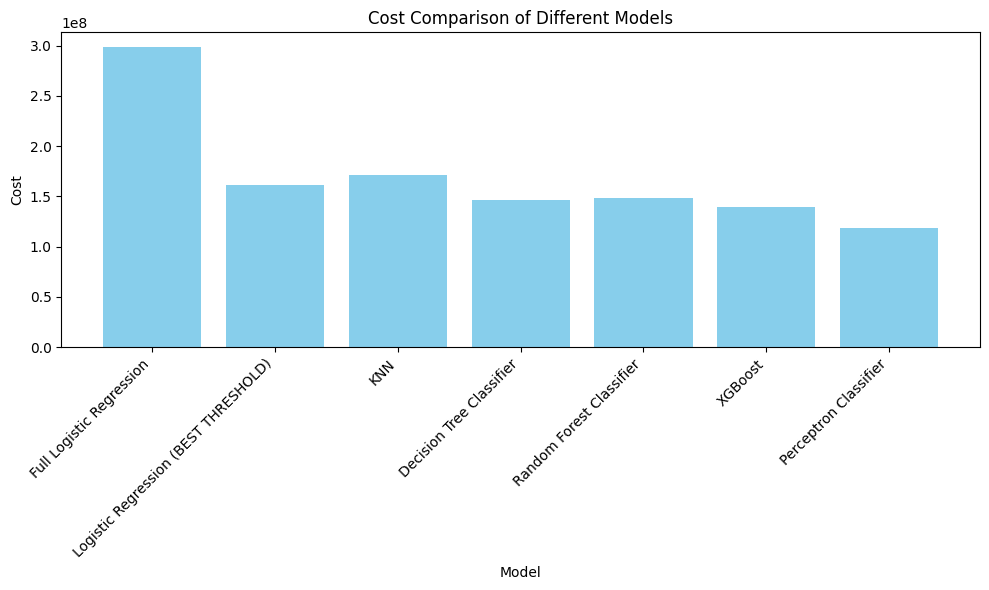

In [ ]:
import matplotlib.pyplot as plt
# Model names
models = ["Full Logistic Regression","Logistic Regression (BEST THRESHOLD)", "KNN", "Decision Tree Classifier",
          "Random Forest Classifier", "XGBoost", "Perceptron Classifier"]

# Costs
costs = [298399269,161768202, 170887230, 146412224, 148188069, 139192337, 118259337]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, costs, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Cost')
plt.title('Cost Comparison of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!jupyter nbconvert --to html /content/drive/MyDrive/ISE599/Diabetes_Prediction.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ISE599/Diabetes_Prediction.ipynb to html
[NbConvertApp] Writing 1931341 bytes to /content/drive/MyDrive/ISE599/Diabetes_Prediction.html
